# Lecture 4: Pandas

March 10, 2025

## Table of contents

0. Technical notes
1. Recap
2. Pandas :: [https://pandas.pydata.org](https://pandas.pydata.org)
3. Exercises

### Midterm

- 80 minutes in class
- NO artificial intelligence helpers
- open book = lectures, google, stackoverflow

### Project

- slowly start to look for your colleagues (pairs, if somebody super alone group of three)

## Questions related to the course

We are starting Week 4. 

Do you need anything to help with?

What would you improve/what do you miss?

## Recap - NumPy

Questions (5 pts)

### Git + Github:

- Are you familiar with it?
- Have you tried to create a repository?

- `!pip` + alternatives


In [2]:
# !pip install pandas

In [3]:
import sys
import pandas as pd

import numpy as np

In [4]:
print(f'Python version {sys.version}')
print(f'Pandas version {pd.__version__}')

Python version 3.11.10 (main, Nov 12 2024, 16:43:03) [Clang 16.0.0 (clang-1600.0.26.4)]
Pandas version 2.2.3


In [5]:
# handling imports, where python looks for modules
sys.path

['/Users/luboshanus/.pyenv/versions/3.11.10/lib/python311.zip',
 '/Users/luboshanus/.pyenv/versions/3.11.10/lib/python3.11',
 '/Users/luboshanus/.pyenv/versions/3.11.10/lib/python3.11/lib-dynload',
 '',
 '/Users/luboshanus/.local/lib/python3.11/site-packages',
 '/Users/luboshanus/.pyenv/versions/3.11.10/lib/python3.11/site-packages']

## Pandas

**Pandas** is a powerful and widely used open-source data manipulation and analysis library in Python. 
It provides data structures like `DataFrame` and `Series`, which make it easy to work with structured data like tables (like in a spreadsheet or SQL). 
It is built on top of `numpy`, making it efficient for numerical computations.

### Why is `pandas` useful?

1. **Ease of Use**: Pandas makes it straightforward to perform data analysis with a simple, readable syntax. Tasks like filtering data, aggregating results, and reshaping data become much easier than using basic Python constructs.
2. **Data Manipulation**: With `pandas`, you can clean, process, and manipulate data. It offers operations for handling missing data, merging datasets, group-by operations, and more.
3. **Data I/O**: It supports loading data from and writing data to various file formats such as CSV, Excel, JSON, SQL databases, and more.
4. **Efficient Handling**: It provides excellent memory and performance optimization for handling large datasets efficiently, thanks to its underlying use of `numpy`.
5. **Integration with Other Libraries**: Pandas integrates well with other data analysis and machine learning libraries in Python, such as `matplotlib` (for plotting), `scikit-learn` (for ML), and `statsmodels` (for statistical analysis).


### Main Data Structures in `pandas`

1. **Series**: A one-dimensional labeled array that can hold any data type.
2. **DataFrame**: A two-dimensional labeled data structure with columns of potentially different data types.

In [6]:
# !pip install pandas

## Data structures in pandas

### Series
* 1D labeled array able to hold any data type (int, str, float, Python objects, etc.)

In [7]:
pd.Series([1,-1,1,-1])

0    1
1   -1
2    1
3   -1
dtype: int64

In [8]:
pd.Series([1,-1,1,-1]).index

RangeIndex(start=0, stop=4, step=1)

`data` (in the example above) can be:

* a dict
* a list
* an ndarray
* a scalar value

Examples of from dict and a scalar value below:

In [9]:
# in case of dictionary
dp = pd.Series({'cat':1, 'dog':2, 'parrot':3})
dp

cat       1
dog       2
parrot    3
dtype: int64

In [10]:
dp.index

Index(['cat', 'dog', 'parrot'], dtype='object')

In [11]:
dp.values

array([1, 2, 3])

In [12]:
dp.loc['cat']

np.int64(1)

In [13]:
pd.Series({'cat':1, 'dog':2, 'parrot':3}).index

Index(['cat', 'dog', 'parrot'], dtype='object')

In [14]:
pd.Series(np.arange(5), index=['a', 'b', 'c', 'd','e'])

a    0
b    1
c    2
d    3
e    4
dtype: int64

* a key difference between Series/pandas and ndarray: operations between Series automatically align the data based on label

In [15]:
a = pd.Series({"Vítek": 5, "Martin": 10, "Honza": 0})

b = pd.Series({"Martin": 20, "Honza": 15, "Vítek": 5})

print(f"A:\n{a}\nB:\n{b}")

A:
Vítek      5
Martin    10
Honza      0
dtype: int64
B:
Martin    20
Honza     15
Vítek      5
dtype: int64


In [16]:
a + b # operations are done by index

Honza     15
Martin    30
Vítek     10
dtype: int64

In [17]:
a = [5,10,0]
b = [20,15,5]

np.array(a) + np.array(b) # now works as expected

array([25, 25,  5])

* looping through (value-by-value) usually not necessary, remember the case of np array

In [18]:
a[0]

5

In [19]:
a = pd.Series({"Vítek": 5, "Martin": 10, "Honza": 0})


In [20]:
a['Vítek']

np.int64(5)

###  DataFrame

* a 2D labeled data structure with columns of potentially different types
* like a spreadsheet or SQL table, or a dict of Series objects
* the most frequently used pandas object 
* can be created:
    * typically by reading a csv file
    * dict of 1D ndarrays, lists, dicts, Series
    * 2D numpy.ndarray
    * a Series
    * another DataFrame

In [21]:
pd.DataFrame({"var": [1, 2, 3], "column2": [0, 0, 0]})

,var,column2
0,1,0
1,2,0
2,3,0


In [22]:
a = pd.DataFrame(
    [{"var": 1, "column2": 0}, {"var": 2, "column2": 0}, {"var": 3, "column2": 0}]
)

In [23]:
a

,var,column2
0,1,0
1,2,0
2,3,0


In [24]:
a.columns, a.index

(Index(['var', 'column2'], dtype='object'),
 RangeIndex(start=0, stop=3, step=1))

In [25]:
# from dict of Series
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "e", "c"]),
    "two": pd.Series([2.0, 1.0, 3.0, 4.0], index=["b", "a", "c", "d"]),
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,NaN,2.0
c,3.0,3.0
d,NaN,4.0
e,2.0,NaN


Now that we have our data unzipped, we can load them into Python, specifically using Pandas tools.

### Data I/O (in/out)
* CSV, JSON, HTML, Excel, HDF5, SQL, pickle, ...
    * for specific details, see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)
* `pd.read_csv()` is the workhorse for reading text files
    * large number of params means great flexibility when getting data in
    
We will work with the course evaluation data from FSV.
  * each observation is a response to the following questionare (... hope it reminds you of something)

In [26]:
# pd.read_csv('04_auxiliary/data_2017_zs.csv', sep=';',  on_bad_lines= 'skip')

In [27]:
# load the "raw" data for one particular year
df = pd.read_csv('04_auxiliary/data_2017_zs.csv', sep = ';', on_bad_lines= 'skip')
df.head(2)

,cislo_dot,kod_predm,nazev_predm,prednasejici,cvicici,q1,q2,q3,q4,q5,...,q7,q8,q9,q10,q11,q12,q13,t1,t2,katedra_code
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp


In [28]:
# df

In [29]:
type(df.tail(2))

pandas.core.frame.DataFrame

In [30]:
df.columns

Index(['cislo_dot', 'kod_predm', 'nazev_predm', 'prednasejici', 'cvicici',
       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 't1', 't2', 'katedra_code'],
      dtype='object')

In [31]:
# raw data have column names in czech, let's rename them
# if you do not want to reassign, you can provide arg. "inplace = True"
df = df.rename(columns = {
    'cislo_dot' : 'number',
    'kod_predm' : 'course_code',
    'nazev_predm' : 'course_title',
    'prednasejici' : 'teachers',
    'cvicici' : 'seminar_leaders',
    't1': 'c_value',
    't2': 'c_improve', 
    'katedra_code' : 'department_code'
})
df.head(2)

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp


In [32]:
# iterative
df.index

RangeIndex(start=0, stop=6995, step=1)

In [33]:
# set column named "course_code" to be an index (or you can use "inplace" option again)
df.set_index('number', inplace=True)

In [34]:
df.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
number,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [35]:
df.shape

(6995, 20)

In [36]:
df.ndim

2

In [37]:
type(df.course_code)

pandas.core.series.Series

In [38]:
# look at the data but refrain from drawing the conclusions
df.head(5)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
number,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [39]:
# make a copy of original data, so if you mess up, can go back to this
# not that smart when you are working with the large data
df_copy = df.copy(deep = True)

* `pd.DataFrame.copy()`:
    * deep: modifications to the data or indices of the copy will not be reflected in the original object
    * shallow: any changes to the data of the original will be reflected in the shallow copy (and vice versa)

In [40]:
# try to call it as a function
# df.shape() # it si an attribute not a function
df.shape

(6995, 20)

In [41]:
# classical data summarization
df.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
count,6847.000000,6827.000000,5458.000000,5457.000000,5458.000000,2600.000000,2600.000000,2600.000000,6776.000000,6829.000000,6783.000000,6801.000000,6798.00000
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,3.000000,4.00000
50%,4.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000,4.000000,4.000000,5.00000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [42]:
#
df.info() # more detailed info

<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 1 to 6997
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   course_code      6995 non-null   object 
 1   course_title     6995 non-null   object 
 2   teachers         5434 non-null   object 
 3   seminar_leaders  2588 non-null   object 
 4   q1               6847 non-null   float64
 5   q2               6827 non-null   float64
 6   q3               5458 non-null   float64
 7   q4               5457 non-null   float64
 8   q5               5458 non-null   float64
 9   q6               2600 non-null   float64
 10  q7               2600 non-null   float64
 11  q8               2600 non-null   float64
 12  q9               6776 non-null   float64
 13  q10              6829 non-null   float64
 14  q11              6783 non-null   float64
 15  q12              6801 non-null   float64
 16  q13              6798 non-null   float64
 17  c_value          21

In [43]:
# memory usage of each column in bytes (useful when working with the larger datasets)
df.memory_usage()

Index              55960
course_code        55960
course_title       55960
teachers           55960
seminar_leaders    55960
q1                 55960
q2                 55960
q3                 55960
q4                 55960
q5                 55960
q6                 55960
q7                 55960
q8                 55960
q9                 55960
q10                55960
q11                55960
q12                55960
q13                55960
c_value            55960
c_improve          55960
department_code    55960
dtype: int64

In [44]:
df.memory_usage().sum()

np.int64(1175160)

In [45]:
df.memory_usage().sum() / 1024**2 # in MB

np.float64(1.1207199096679688)

In [46]:
df.memory_usage?

Signature: df.memory_usage(index: 'bool' = True, deep: 'bool' = False) -> 'Series'
Docstring:
Return the memory usage of each column in bytes.

The memory usage can optionally include the contribution of
the index and elements of `object` dtype.

This value is displayed in `DataFrame.info` by default. This can be
suppressed by setting ``pandas.options.display.memory_usage`` to False.

Parameters
----------
index : bool, default True
    Specifies whether to include the memory usage of the DataFrame's
    index in returned Series. If ``index=True``, the memory usage of
    the index is the first item in the output.
deep : bool, default False
    If True, introspect the data deeply by interrogating
    `object` dtypes for system-level memory consumption, and include
    it in the returned values.

Returns
-------
Series
    A Series whose index is the original column names and whose values
    is the memory usage of each column in bytes.

See Also
--------
numpy.ndarray.nbytes : Total by

In [47]:
df.tail(1)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
number,,,,,,,,,,,,,,,,,,,,
6997,JJM340,Tvůrčí dílny – tvůrčí psaní I,"Novotný,D.","Novotný,D.",5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,5.0,5.0,4.0,5.0,Ja kurz absolvovala s panem docentem Malym - j...,NaN,kz


In [48]:
df.shape

(6995, 20)

In [49]:
df.iloc[-1]

course_code                                                   JJM340
course_title                           Tvůrčí dílny – tvůrčí psaní I
teachers                                                  Novotný,D.
seminar_leaders                                           Novotný,D.
q1                                                               5.0
q2                                                               5.0
q3                                                               5.0
q4                                                               5.0
q5                                                               5.0
q6                                                               5.0
q7                                                               4.0
q8                                                               5.0
q9                                                               1.0
q10                                                              5.0
q11                               

* you can treat a DataFrame semantically like a dict of like-indexed Series objects
    * getting, setting, and deleting columns works with the same syntax as the analogous dict operations

## Indexing/Selection

| Operation                      | Syntax        |  Result   |
|--------------------------------|---------------|-----------|
| Select column                  | df[col]       |  Series   |
| Select row by label            | df.loc[label] |  Series   |
| Select row by integer location | df.iloc[loc]  |  Series   |
| Slice rows                     | df[5:10]      | DataFrame |
| Select rows by boolean vector  | df[bool_vec]  | DataFrame |

In [50]:
# gives us series
df['course_title']

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [51]:
# this demonstrates usefulness of proper column naming
df.course_title

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [52]:
# multiple columns -> gives us dataframe
df[['course_title']]

,course_title
number,
1,Ekonomie I
2,Angličtina pro ekonomy I
3,Matematika 1
4,Úvod do studia práva
5,Seminář k aktualitám I
...,...
6993,Novinářská etika v praxi
6994,Diplomový seminář II.
6995,Ekonomika v médiích


In [53]:
# just one column: just convenience (if column name has a space or dot, you are screwed)
#naming conventions: no special character, underscore for spaces, no CZECH chars! informative and short
df.course_title

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [54]:
# subset of columns you want 
df[['course_title','teachers']].head(10)

,course_title,teachers
number,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N."
2,Angličtina pro ekonomy I,NaN
3,Matematika 1,"Spurný,J."
4,Úvod do studia práva,"Pražák,P.,Wintr,J."
5,Seminář k aktualitám I,NaN
6,Theories of International Relations,"Ditrych,O.,Plechanovová,B."
7,Úvod do ekonomie,"Kameníček,J."
8,Seminář matematické analýzy I,NaN
9,Regional Security Studies,"Karásek,T.,Klosek,K."


In [55]:
# list of all columns 
df.columns

Index(['course_code', 'course_title', 'teachers', 'seminar_leaders', 'q1',
       'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12',
       'q13', 'c_value', 'c_improve', 'department_code'],
      dtype='object')

In [56]:
# adding columns (first adding, so we have something to drop)
df['tmp'] = '11/10'
# you can also use assign function, if new column should be a function of original column 
df.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,11/10
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10


In [57]:
df['sumq1q2'] = df.q1 + df.q2
df.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,tmp,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,11/10,8.0
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,...,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,11/10,8.0
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,8.0
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,11/10,7.0
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,11/10,5.0


In [58]:
# drop column (you can also use 'del' (a general python command for deleting)
df.drop('tmp', axis = 1, inplace = True) # axis to specify you want to drop column, inplace operation in this case

In [59]:
df.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,8.0
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0


In [60]:
(df.department_code == 'ies') & (df.teachers.str.contains('Baruník'))

number
1       False
2       False
3       False
4       False
5       False
        ...  
6993    False
6994    False
6995    False
6996    False
6997    False
Length: 6995, dtype: bool

In [61]:
df[(df.department_code == 'ies') & (df.teachers.str.contains('Baruník'))].shape

(40, 21)

In [62]:
df[df.department_code == 'ies']

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0
7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,...,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,JEB105,Statistics,"Červinka,M.","Smutná,Š.",2.0,4.0,1.0,2.0,2.0,5.0,...,5.0,1.0,4.0,4.0,3.0,1.0,"Domácí úkoly, ačkoliv systém hodnocení je extr...",Přednášky. Pan Červinka se vše snaží dělat mno...,ies,6.0
6976,NMMA703,Matematika 3,"Zelený,M.","Zelený,M.",5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,10.0
6977,JEB114,Macroeconomics I,"Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.","Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.",1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,2.0,2.0,2.0,1.0,NaN,NaN,ies,2.0


### Location and Idioms
* `.loc` selects data by the label of the rows and columns (as opposed to the `.iloc`) integer location
* we can also use `.loc` for subsetting based on condition(s)

In [63]:
df.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       6988, 6989, 6990, 6991, 6992, 6993, 6994, 6995, 6996, 6997],
      dtype='int64', name='number', length=6995)

In [64]:
df.loc[5:25:3, ['department_code','teachers']]

,department_code,teachers
number,,
5,ies,NaN
8,ies,NaN
11,cjp,NaN
14,ks,"Hendl,J."
17,ks,"Bureš,J.,Numerato,D."
20,kvsp,"Vlk,A."
23,ks,"Soukup,P."


In [65]:
# df.iloc[5:25:3, [-2, 2]] # iloc is integer based, different from loc which is label based
df[['department_code','teachers']].iloc[5:25:3]

,department_code,teachers
number,,
6,kmv,"Ditrych,O.,Plechanovová,B."
9,kbs,"Karásek,T.,Klosek,K."
12,kbs,"Daniel,J."
15,kmv,"Parízek,M."
18,kvsp,"Drhová,Z."
21,kbs,"Duračinská,Z.,Střítecký,V."
24,kms,"Bednařík,P.,Končelík,J."


What might be a problematic difference?

#### Subset using a mask

- Masking is a way to filter data by creating a "mask" (boolean array) that indicates which rows or columns should be included in a subset.
- It makes it easy to filter rows based on complex conditions.
- The approach is efficient and readable for selecting subsets of data in pandas.
  1) Create a mask (`True` or `False`)
  2) Apply the mask

In [66]:
# select only observations for IES only, mask done at once
df_ies = df.loc[df['department_code'] == 'ies']

In [67]:
df_ies.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0
7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,...,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,7.0


In [68]:
(df['course_title'] == 'Advanced Econometrics')

number
1       False
2       False
3       False
4       False
5       False
        ...  
6993    False
6994    False
6995    False
6996    False
6997    False
Name: course_title, Length: 6995, dtype: bool

In [69]:
# select only observations for Advanced Econometrics
df.loc[df['course_title'] == 'Advanced Econometrics'].head(5)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
89,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",5.0,5.0,5.0,5.0,4.0,5.0,...,5.0,1.0,5.0,5.0,5.0,1.0,Mr.Barunik is very sexy,NaN,ies,10.0
973,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,3.0,5.0,4.0,4.0,NaN,NaN,ies,8.0
1043,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",4.0,4.0,5.0,4.0,4.0,3.0,...,2.0,2.0,4.0,4.0,4.0,5.0,NaN,NaN,ies,8.0
1138,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",NaN,5.0,4.0,4.0,4.0,3.0,...,3.0,NaN,2.0,5.0,5.0,5.0,The lecturers teaching method.,More practical exercises and involvement of st...,ies,NaN
1515,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",5.0,4.0,5.0,5.0,5.0,4.0,...,4.0,2.0,5.0,4.0,5.0,5.0,NaN,NaN,ies,9.0


**Using ~ to Invert a Mask**

The tilde (~) symbol is used as a bitwise NOT operator, often applied to invert a boolean mask.

In [70]:
~(df['course_title'] == 'Advanced Econometrics')

number
1       True
2       True
3       True
4       True
5       True
        ... 
6993    True
6994    True
6995    True
6996    True
6997    True
Name: course_title, Length: 6995, dtype: bool

In [71]:
# sub-setting based on multiple conditions: AE and non-missing comment on what to improve
df.loc[(df['course_title'] == 'Advanced Econometrics') & (~df['c_improve'].isnull())].head(2)

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1138,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",NaN,5.0,4.0,4.0,4.0,3.0,...,3.0,NaN,2.0,5.0,5.0,5.0,The lecturers teaching method.,More practical exercises and involvement of st...,ies,NaN
1870,JEM005,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",3.0,5.0,5.0,5.0,5.0,3.0,...,3.0,1.0,3.0,3.0,2.0,3.0,Positive atmosphere the lecturer provided,It was too theoretical and abstract. Since it ...,ies,8.0


* Sometimes, we don't have a clear list of columns to be selected ready, e.g. how to select columns from q1 to q13? 
    * using actual list of column names :(
        * be lazy!
    * or ... 

In [72]:
print([x for x in df.columns if "q" in x[:2]])  # by substring

['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']


In [73]:
# list comprehension
print([x for x in df.columns if "q" in x])  # by substring
print([x for x in df.columns if (len(x) == 2) | (len(x) == 3)])  # by length
print([x for x in df.columns if x.startswith("q")])  # by first letter
# by regular expression is the safest - q and then at most 2 digit number -> later in course

['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'sumq1q2']
['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']
['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']


In [74]:
[x for x in df.columns if 'q' in x]

['q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7',
 'q8',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13',
 'sumq1q2']

In [75]:
df_q = df[[x for x in df.columns if 'q' in x]]
df_q.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,8.0
2,5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,8.0
3,3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,8.0
4,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,7.0
5,2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,5.0


### Using functions on pandas objects

| Operation          | Function              |
|--------------------|-----------------------|
| Row or Column-wise | `apply()`             |
| Aggregation        | `agg() / transform()` |
| Elementwise        | `applymap()`          |

**Tablewise**
* DFs and Series can be arguments of the functions
* if multiple functions need to be called in a sequence, use `pipe()` method, also called the method chaining
    * often used in the data science setting
    * inspired by unix pipes and dplyr (%>%) operator in R 

**Row or Column-wise Function Application**
* `apply()` is extremely powerful, when used with some brainpower

In [76]:
df_q.apply(np.mean, axis=0)

q1         4.108661
q2         3.284166
q3         4.214731
q4         4.359355
q5         3.872664
q6         4.288462
q7         4.494231
q8         4.151923
q9         1.419126
q10        4.020940
q11        3.574672
q12        3.896927
q13        4.127390
sumq1q2    7.391630
dtype: float64

In [77]:
# using lambda - anonymous function
# standardization to unit variance
df_q.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=0)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,-1.087263,1.624450,-0.208011,0.641156,0.100486,-2.372213,-0.557151,-1.008367,-0.540553,-0.019588,-2.020880,NaN,-1.893661,0.406616
2,0.874136,-0.269031,NaN,NaN,NaN,0.737579,0.570158,0.742387,-0.540553,0.915860,1.118751,0.988510,0.776739,0.406616
3,-1.087263,1.624450,-1.176717,-2.361237,-2.266929,-0.299018,-0.557151,0.742387,-0.540553,-0.955037,-1.235972,-1.699916,-2.783794,0.406616
4,-1.087263,0.677709,-1.176717,-1.360439,-2.266929,NaN,NaN,NaN,-0.540553,-0.955037,-1.235972,-0.803774,-1.893661,-0.261754
5,-2.067962,-0.269031,NaN,NaN,NaN,-2.372213,-1.684460,-2.759122,-0.540553,-0.019588,-1.235972,-1.699916,-2.783794,-1.598493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,0.874136,1.624450,0.760695,0.641156,0.889624,NaN,NaN,NaN,-0.540553,0.915860,0.333843,0.988510,0.776739,1.743355
6994,-2.067962,-0.269031,-1.176717,-1.360439,-0.688653,NaN,NaN,NaN,-0.540553,-2.825933,-2.020880,-1.699916,-1.003528,-1.598493
6995,0.874136,0.677709,0.760695,0.641156,0.100486,NaN,NaN,NaN,0.749160,0.915860,-0.451065,0.988510,0.776739,1.074986


In [78]:
# using custom function, with arguments (could have also be done with lambda)
def add_and_substract(df, sub=1, add=1):
    return df - sub + add


df_q.apply(add_and_substract, args=(1, -1))

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,1.0,3.0,2.0,3.0,2.0,0.0,2.0,1.0,-1.0,2.0,-1.0,NaN,0.0,6.0
2,3.0,1.0,NaN,NaN,NaN,3.0,3.0,3.0,-1.0,3.0,3.0,3.0,3.0,6.0
3,1.0,3.0,1.0,0.0,-1.0,2.0,2.0,3.0,-1.0,1.0,0.0,0.0,-1.0,6.0
4,1.0,2.0,1.0,1.0,-1.0,NaN,NaN,NaN,-1.0,1.0,0.0,1.0,0.0,5.0
5,0.0,1.0,NaN,NaN,NaN,0.0,1.0,-1.0,-1.0,2.0,0.0,0.0,-1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,-1.0,3.0,2.0,3.0,3.0,8.0
6994,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,0.0,1.0,3.0
6995,3.0,2.0,3.0,3.0,2.0,NaN,NaN,NaN,0.0,3.0,1.0,3.0,3.0,7.0


In [79]:
# A little bit more sophisticated:  show the longest comment
df.loc[df["c_value"].apply(lambda x: len(str(x))).idxmax(), ["seminar_leaders", "c_value"]]

seminar_leaders    Chorna,O.,Malinská,B.,Pertold-Gebicka,B.,Pleti...
c_value            1) Empirical project was very beneficial, as w...
Name: 4566, dtype: object

In [80]:
df["c_value"].apply(lambda x: len(str(x))).idxmax()

np.int64(4566)

In [81]:
pd.DataFrame.idxmax?

Signature:
pd.DataFrame.idxmax(
    self,
    axis: 'Axis' = 0,
    skipna: 'bool' = True,
    numeric_only: 'bool' = False,
) -> 'Series'
Docstring:
Return index of first occurrence of maximum over requested axis.

NA/null values are excluded.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The axis to use. 0 or 'index' for row-wise, 1 or 'columns' for column-wise.
skipna : bool, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

    .. versionadded:: 1.5.0

Returns
-------
Series
    Indexes of maxima along the specified axis.

Raises
------
ValueError
    * If the row/column is empty

See Also
--------
Series.idxmax : Return index of the maximum element.

Notes
-----
This method is the DataFrame version of ``ndarray.argmax``.

Examples
--------
Consider a dataset containing food consumption in Argentina.

>>> df = pd.DataF

In [82]:
df.loc[df["c_value"].apply(lambda x: len(str(x))).idxmax()]

course_code                                                   JEB110
course_title                                         Econometrics II
teachers                                          Pertold-Gebicka,B.
seminar_leaders    Chorna,O.,Malinská,B.,Pertold-Gebicka,B.,Pleti...
q1                                                               2.0
q2                                                               4.0
q3                                                               3.0
q4                                                               3.0
q5                                                               3.0
q6                                                               3.0
q7                                                               4.0
q8                                                               3.0
q9                                                               2.0
q10                                                              4.0
q11                               

In [83]:
df.index[max(df["c_value"].apply(lambda x: len(str(x)))) == df["c_value"].apply(lambda x: len(str(x)))] # alternative to find max and its index

Index([4566], dtype='int64', name='number')

In [84]:
df.loc[df.index[max(df["c_value"].apply(lambda x: len(str(x)))) == df["c_value"].apply(lambda x: len(str(x)))]] 

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
4566,JEB110,Econometrics II,"Pertold-Gebicka,B.","Chorna,O.,Malinská,B.,Pertold-Gebicka,B.,Pleti...",2.0,4.0,3.0,3.0,3.0,3.0,...,3.0,2.0,4.0,3.0,3.0,2.0,"1) Empirical project was very beneficial, as w...",1) Course organizational side was not good. I ...,ies,6.0


**Aggregation**
* *`aggregate()`* and *`transform()`*
* aggregation allows multiple aggregation operations in a single concise way
* `transform()` method returns an object that is indexed the same as the original
   * allows multiple operations at the same time, instead of one-by-one as `aggregate()` method

In [85]:
# aggregating simple function is the same as apply
df_q.agg(np.mean, axis=0)

/var/folders/14/ykkm38v9639_qss4fq5k7s7w0000gn/T/ipykernel_74323/666997645.py:2: FutureWarning: The provided callable <function mean at 0x118979bc0> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_q.agg(np.mean, axis=0)


q1         4.108661
q2         3.284166
q3         4.214731
q4         4.359355
q5         3.872664
q6         4.288462
q7         4.494231
q8         4.151923
q9         1.419126
q10        4.020940
q11        3.574672
q12        3.896927
q13        4.127390
sumq1q2    7.391630
dtype: float64

In [86]:
# df_q.mean()

In [87]:
# aggregating more functions more interesting (you could do your own describe function easily! )
df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)

/var/folders/14/ykkm38v9639_qss4fq5k7s7w0000gn/T/ipykernel_74323/3191589311.py:2: FutureWarning: The provided callable <function mean at 0x118979bc0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)
/var/folders/14/ykkm38v9639_qss4fq5k7s7w0000gn/T/ipykernel_74323/3191589311.py:2: FutureWarning: The provided callable <function std at 0x118979d00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)
/var/folders/14/ykkm38v9639_qss4fq5k7s7w0000gn/T/ipykernel_74323/3191589311.py:2: FutureWarning: The provided callable <function min at 0x118979300> is currently using Series.min. In a future version of pandas, the provided callable will be used dir

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739,7.391630
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351,1.496288
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,10.000000


In [88]:
# df_q.aggregate([pd.Series.mean, pd.Series.std, pd.Series.min, pd.Series.max], axis=0)

In [89]:
# aggregating using dictionary, i.e. column specific aggregation 
df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})

/var/folders/14/ykkm38v9639_qss4fq5k7s7w0000gn/T/ipykernel_74323/72875345.py:2: FutureWarning: The provided callable <function mean at 0x118979bc0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})
/var/folders/14/ykkm38v9639_qss4fq5k7s7w0000gn/T/ipykernel_74323/72875345.py:2: FutureWarning: The provided callable <function std at 0x118979d00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})
/var/folders/14/ykkm38v9639_qss4fq5k7s7w0000gn/T/ipykernel_74323/72875345.py:2: FutureWarning: The provided callable <function var at 0x118979e40> is currently using Series.var. In a future version of pandas, the provided

,q1,q2,q3
mean,4.108661,NaN,4.214731
std,NaN,1.056333,1.032399
var,NaN,NaN,1.065849


In [90]:
# using single function, the same as with apply
df_q.transform(lambda x: np.power(x,2))

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,9.0,25.0,16.0,25.0,16.0,4.0,16.0,9.0,1.0,16.0,1.0,NaN,4.0,64.0
2,25.0,9.0,NaN,NaN,NaN,25.0,25.0,25.0,1.0,25.0,25.0,25.0,25.0,64.0
3,9.0,25.0,9.0,4.0,1.0,16.0,16.0,25.0,1.0,9.0,4.0,4.0,1.0,64.0
4,9.0,16.0,9.0,9.0,1.0,NaN,NaN,NaN,1.0,9.0,4.0,9.0,4.0,49.0
5,4.0,9.0,NaN,NaN,NaN,4.0,9.0,1.0,1.0,16.0,4.0,4.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,25.0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,1.0,25.0,16.0,25.0,25.0,100.0
6994,4.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,1.0,1.0,1.0,4.0,9.0,25.0
6995,25.0,16.0,25.0,25.0,16.0,NaN,NaN,NaN,4.0,25.0,9.0,25.0,25.0,81.0


In [91]:
# using multiple functions (can also be done using dictionary as in the case of aggregate)
df_q.transform([np.abs, lambda x: x + 1])

q1                q2                q3                q4  \
       absolute <lambda> absolute <lambda> absolute <lambda> absolute   
number                                                                  
1           3.0      4.0      5.0      6.0      4.0      5.0      5.0   
2           5.0      6.0      3.0      4.0      NaN      NaN      NaN   
3           3.0      4.0      5.0      6.0      3.0      4.0      2.0   
4           3.0      4.0      4.0      5.0      3.0      4.0      3.0   
5           2.0      3.0      3.0      4.0      NaN      NaN      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
6993        5.0      6.0      5.0      6.0      5.0      6.0      5.0   
6994        2.0      3.0      3.0      4.0      3.0      4.0      3.0   
6995        5.0      6.0      4.0      5.0      5.0      6.0      5.0   
6996        3.0      4.0      3.0      4.0      5.0      6.0      5.0   
6997        5.0      6.0      5.0      6.0      5.0      6.0      5.0   

                      q5           ...      q10               q11           \
       <lambda> absolute <lambda>  ... absolute <lambda> absolute <lambda>   
number                             ...                                       
1           6.0      4.0      5.0  ...      4.0      5.0      1.0      2.0   
2           NaN      NaN      NaN  ...      5.0      6.0      5.0      6.0   
3           3.0      1.0      2.0  ...      3.0      4.0      2.0      3.0   
4           4.0      1.0      2.0  ...      3.0      4.0      2.0      3.0   
5           NaN      NaN      NaN  ...      4.0      5.0      2.0      3.0   
...         ...      ...      ...  ...      ...      ...      ...      ...   
6993        6.0      5.0      6.0  ...      5.0      6.0      4.0      5.0   
6994        4.0      3.0      4.0  ...      1.0      2.0      1.0      2.0   
6995        6.0      4.0      5.0  ...      5.0      6.0      3.0      4.0   
6996        6.0      1.0      2.0  ...      1.0      2.0      3.0      4.0   
6997        6.0      5.0      6.0  ...      5.0      6.0      5.0      6.0   

            q12               q13           sumq1q2           
       absolute <lambda> absolute <lambda> absolute <lambda>  
number                                                        
1           NaN      NaN      2.0      3.0      8.0      9.0  
2           5.0      6.0      5.0      6.0      8.0      9.0  
3           2.0      3.0      1.0      2.0      8.0      9.0  
4           3.0      4.0      2.0      3.0      7.0      8.0  
5           2.0      3.0      1.0      2.0      5.0      6.0  
...         ...      ...      ...      ...      ...      ...  
6993        5.0      6.0      5.0      6.0     10.0     11.0  
6994        2.0      3.0      3.0      4.0      5.0      6.0  
6995        5.0      6.0      5.0      6.0      9.0     10.0  
6996        3.0      4.0      5.0      6.0      6.0      7.0  
6997        4.0      5.0      5.0      6.0     10.0     11.0  

[6995 rows x 28 columns]

## Missing values

Handling missing values is a common task in data cleaning.

1. Identifying Missing Values
    
    In `pandas`, missing values are usually represented as `NaN` (Not a Number). To identify missing values, you can use:

- `isna()` or `isnull()`: Returns a DataFrame of booleans indicating where values are NaN.
- `notna()` or `notnull()`: Opposite of `isna()`, returns True for non-NaN values.
- `any()` and `sum()`: Combined with `isna()`, they can help you see how many or if any missing values are in each column.

2. Dropping Missing Values

    `dropna()`: Removes rows or columns with missing values.

3. Filling Missing Values
   
   `fillna(value=0)`: Fill `NaN`s with a specified value
   
4. Replacing Specific Values

    `replace("", pd.NA, inplace=True)`: Replace specific values with `NaN`

5. Interpolating Missing Values

    `interpolate()`: Estimates missing values by interpolating the data. You can specify different methods like linear, polynomial, or time.
    
6. Using Conditional Fill

In [92]:
df.head()

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,8.0
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0


In [93]:
df.teachers.notnull()

number
1        True
2       False
3        True
4        True
5       False
        ...  
6993     True
6994    False
6995     True
6996     True
6997     True
Name: teachers, Length: 6995, dtype: bool

In [94]:
df.teachers.notnull().sum()

np.int64(5434)

In [95]:
# check for missing values, sum is summing those NA
df.teachers.isna().any(), df.teachers.isna().sum() # isna is alias for isnull

(np.True_, np.int64(1561))

In [96]:
df[df.teachers.notnull()]

,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
6,JPM314,Theories of International Relations,"Ditrych,O.,Plechanovová,B.",NaN,2.0,3.0,2.0,4.0,1.0,NaN,...,NaN,2.0,3.0,1.0,3.0,1.0,NaN,NaN,kmv,5.0
7,JEB998,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,...,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,JPM620,Geopolitical Thought,"Kofroň,J.",NaN,3.0,4.0,3.0,3.0,3.0,NaN,...,NaN,1.0,4.0,3.0,4.0,3.0,NaN,NaN,kp,7.0
6993,JJM260,Novinářská etika v praxi,"Moravec,V.",NaN,5.0,5.0,5.0,5.0,5.0,NaN,...,NaN,1.0,5.0,4.0,5.0,5.0,"Tlak ze strany vyucujicicho - eseje, pestovani...",Vetsi ucebnu?,kz,10.0
6995,JJM360,Ekonomika v médiích,"Klimeš,D.",NaN,5.0,4.0,5.0,5.0,4.0,NaN,...,NaN,2.0,5.0,3.0,5.0,5.0,Hosty a jejich prednasky.,NaN,kz,9.0


% of missing observations for specific column

In [97]:
df["q1"].isnull().sum() / df["q1"].count()

np.float64(0.021615305973419017)

% of missing observations for all columns

<Axes: >

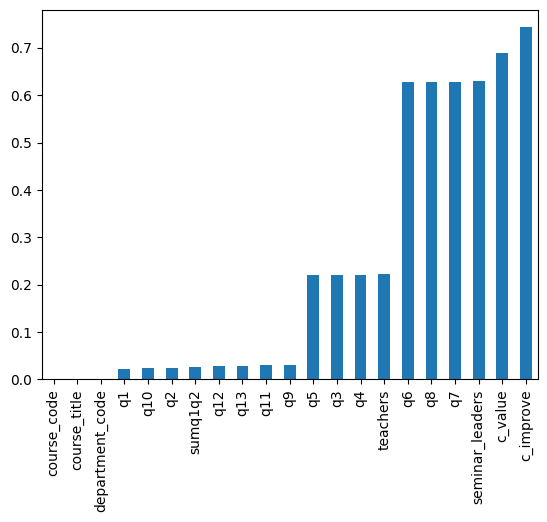

In [98]:
(df.isnull().sum() / df.shape[0]).sort_values().plot.bar()

<Axes: >

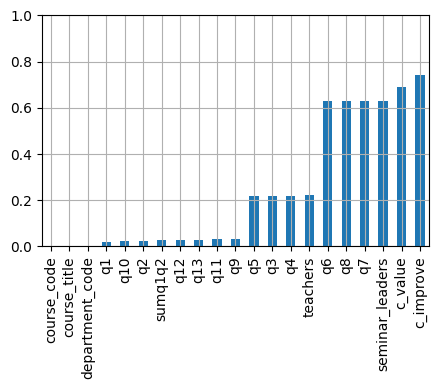

In [99]:
(df.isnull().sum() / df.shape[0]).sort_values().plot.bar(ylim=(0, 1), grid=True, figsize=(5,3))

In [100]:
print(df.dropna(subset=['q1', 'q2'], how='any').shape)
df.dropna(subset=['q1', 'q2'], how='any').head()

(6810, 21)


,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,,
1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,...,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,8.0
3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,...,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,...,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,...,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0


In [101]:
df.dropna().shape # drop all rows with any missing value

(222, 21)

## Matplotlib <a name="introduction"></a>

* "A picture is worth a thousand words."
    * more like "A picture is worth a few lines of code."
* development started in 2003 by John D. Hunter, a neurobiologist (inspired by MATLAB software)
* generating basic plots in *matplotlib* is simple, mastering the library can be little bit less pleseant (we skip this part)
* you can have as much control as you want, but you can also concede as much control as you want 
* [**gallery**](https://matplotlib.org/stable/gallery/index.html)
    * can get help to problems like "I want to make a figure that looks something I've seen somewhere." (hard to google)
* plotting consists of many layers, from general 'contour this 2D array' to very specific 'color this screen pixel'
    * key is allowing both levels to coexist in one package
* *matplotlib* has 2 interfaces:
    1. "state-machine environment" (based on MATLAB)
    2. a object-oriented interface
* this often creates confusion (multiple, conflicting, solutions on the web)
* another common confusion is the relationship of *Matplotlib, pyplot and pylab*
    * Matplotlib is the whole package
    * `matplotlib.pyplot` is a module in matplotlib
    * `pylab` is a a convenience module doing a bulk import of `pyplot` and `numpy`

* [anatomy of the plot](https://matplotlib.org/examples/showcase/anatomy.html) from matplotlib

<img src= "https://matplotlib.org/_images/anatomy.png" width= "600" height="400">

* the *figure* keeps track of all the child *Axes*, titles,legends, etc.
    * the figure can have any number of *Axes*
* *Axes* is 'a plot', i.e. the region of the image with the data space
    * given *Axes* object can only be in one Figure
    * *Axes* contains 2 (3 in case of 3D) *Axis* objects which take care of the data limits (conrolled via `set_xlim()` method)
    * each *Axes* has a title (`set_title()`), an x- and y-labels (`set_xlabel()`)
* *Artist* is anything you can see on the figure, e.g. text objects, Line2D objects, etc.

* `matplolib.pyplot` functions make some changes to a figure, e.g. create a figure, plot some lines, etc.
    * the plotting functions are directed to the current axes

* all of plotting functions expect `np.array` or `array-like` data objects (for majority of cases works out of the box)

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
# increasing the size of the figure
plt.figure(figsize = (20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [104]:
from time import sleep

In [105]:
plt_styles_list = plt.style.available

In [106]:
len(plt_styles_list)

28

Solarize_Light2


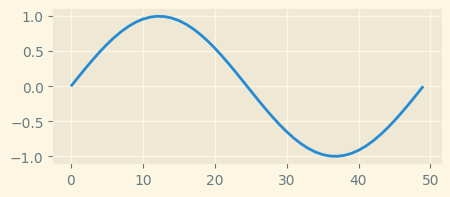

_mpl-gallery


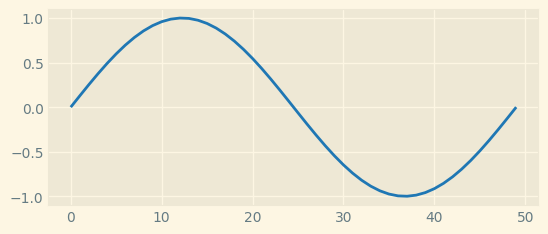

bmh


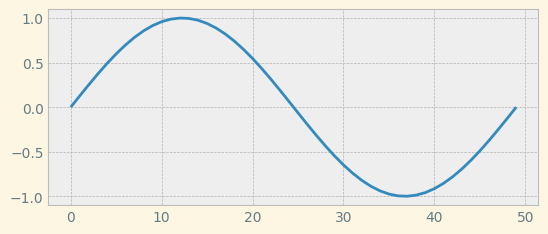

dark_background


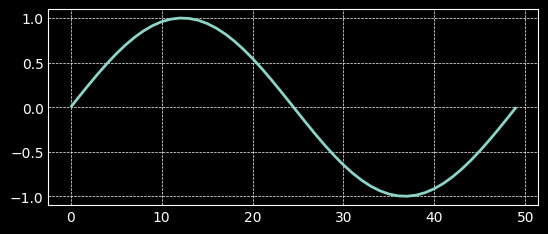

fivethirtyeight


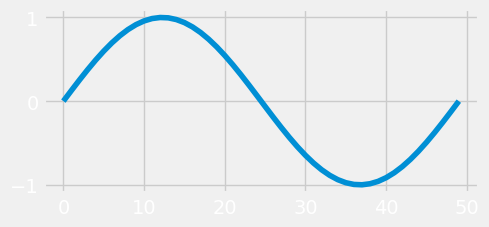

In [107]:
# let's see how different styles look like
for style in plt_styles_list[:10:2]:
    plt.style.use(style)
    print(style)
    plt.figure(figsize=(5,2))
    plt.plot(np.sin(np.linspace(0,2*np.pi)))
    plt.show()
    sleep(1)

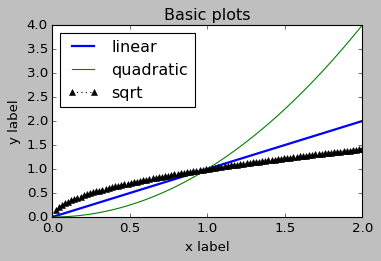

In [108]:
plt.style.use('classic')
# minimum example of pyplot
x = np.linspace(0, 2, 100)

# we can also specify only "y" and use default x-axis: plt.plot(x, label='linear')
plt.figure(figsize=(5,3))
plt.plot(x, x, label='linear',  linewidth=2.0)
plt.plot(x, x**2, label='quadratic')
plt.plot(x, np.sqrt(x),'k^:',label='sqrt')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Basic plots")

plt.legend(loc = 'best');

In [109]:
plt

<module 'matplotlib.pyplot' from '/Users/luboshanus/.pyenv/versions/3.11.10/lib/python3.11/site-packages/matplotlib/pyplot.py'>

* for multiple subplots: `fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))`
* call `plt.subplot()` and specify three numbers:
    * number of rows
    * number of columns
    * subplot number you want to activate.
* if subplots are too squished `plt.tight_layout()`

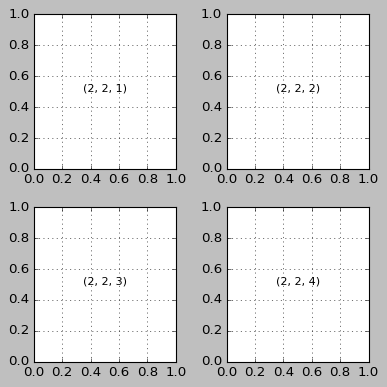

In [110]:
plt.figure(figsize=(5,5))
for i in range (1, 5):
    plt.subplot(2, 2, i)
    plt.text(0.5,0.5, str((2, 2, i)), ha='center', fontsize = 10) #again, just a plot
    plt.tight_layout() 
    plt.grid(True) # add the grid

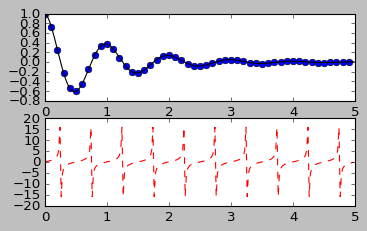

In [111]:
# for multiple figures and axes 

def f(x):
    return np.exp(-x) * np.cos(2*np.pi*x)

x1 = np.arange(0.0, 5.0, 0.1)
x2 = np.arange(0.0, 5.0, 0.02)


plt.figure(1, figsize=(5,3)) # optional, since figure(1) will be created by default
plt.subplot(211)
plt.plot(x1, f(x1), 'bo', x2, f(x2), 'k')

plt.subplot(212)
plt.plot(x2, np.tan(2*np.pi*x2), 'r--')

plt.show()

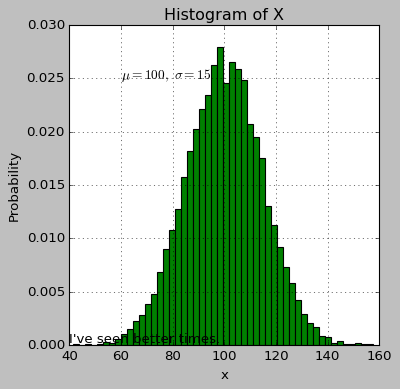

In [112]:
mu, sigma, n = 100, 15, 10000
x = np.random.normal(mu, sigma, n)

plt.figure(figsize=(5,5))
# the histogram of the data
plt.hist(x, bins = 50, density= True, facecolor='g')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram of X')

# Adding text, with LaTeX syntax, for math symbols
# meaningful text, 
plt.text(60, .025, f'$\mu={mu},\ \sigma={sigma}$')
# tail events text
plt.text(40, .00025, f"I've seen better times.")

plt.grid(True)

## Saving plots

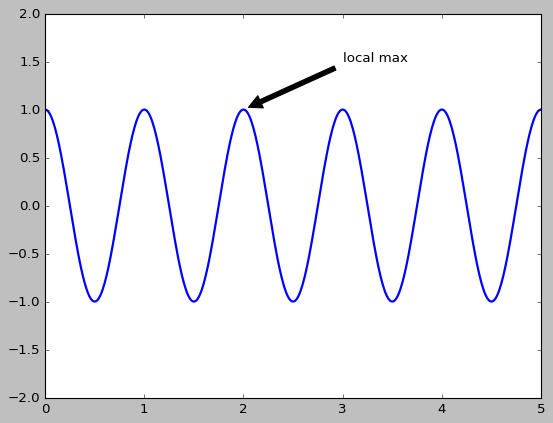

<Figure size 640x480 with 0 Axes>

In [113]:
# ax = plt.subplot()
plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

# actually saving
plt.savefig('04_auxiliary/local_max.png')

Explanation of fig and ax, you might encounter when working with plots (openAI):

`fig, ax = plt.subplots()` or `fig, ax = plt.figure()` is a common syntax used for creating plots with control over the `figure` and its `axes`.

`fig, ax = plt.subplots()`

`fig`: The canvas, representing the whole figure, where you set properties affecting all subplots.

`ax` or `axes`: The individual plot areas (one or more Axes) within the figure, where you do the actual plotting and customization.

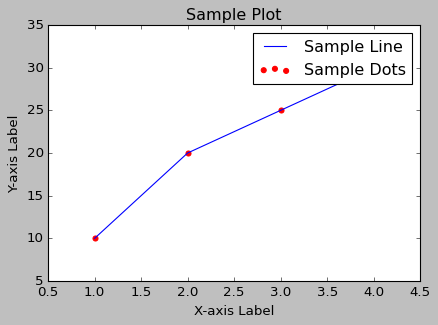

In [114]:
# Example
import matplotlib.pyplot as plt

# Create a figure with a single Axes
fig, ax = plt.subplots(figsize=(6, 4))  # figsize the size of the figure in inches

# Plot data on the Axes
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Sample Line')

ax.scatter([1, 2, 3, 4], [10, 20, 25, 30], label='Sample Dots', color='red')

# Customize the Axes
ax.set_title('Sample Plot')
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.legend()

# Show the figure
plt.show()